In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'category', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'float64', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.


train = pd.read_csv('C:/Users/Alan Camussi/Desktop/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)


In [3]:
#Chequeamos si hay valores nulos para ver si es relevante hacer el analisis
train.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [4]:
#Hay 372 registros con valores de ciudad nulos. Es muy poco comparado con la canidad total de registros que son 240 mil
train.loc[train['ciudad'].isnull()].shape

(372, 23)

In [5]:
#Hay 125 registros con valores de provincia nulos. Es muy poco comparado con la canidad total de registros que son 240 mil
train.loc[train['provincia'].isnull()].shape

(155, 23)

In [6]:
#Hay 28.621 registros con valores de idzona nulos. Es bastante comparado con los 240 mil (12%).
#Este % puede comprometer el analisis a realizar por ende se descarta;
train.loc[train['idzona'].isnull()].shape

(28621, 23)

In [61]:
train_prov = train.groupby('provincia').agg({'id':'count', 'precio':'mean'})

#Resetea los indices para que id sea columna
train_prov = train_prov.reset_index()

# Muestra cada provincia con su correspondiente cantidad de propiedades y su promedio de precio 
# ordenados de mayor a menor por cantidad de propiedades
train_prop_prov = train_prov[['provincia', 'id']].sort_values(by='id', ascending=False)

train_prop_prov = train_prop_prov.rename(columns={'id':'cantidad_propiedades'})
train_prop_prov


,provincia,cantidad_propiedades
8,Distrito Federal,58790
10,Edo. de México,41607
14,Jalisco,21238
21,Querétaro,16988
18,Nuevo León,15324
20,Puebla,10421
23,San luis Potosí,8447
30,Yucatán,7928
16,Morelos,7337
29,Veracruz,5762


Text(0, 0.5, 'Nombre de la provincia')

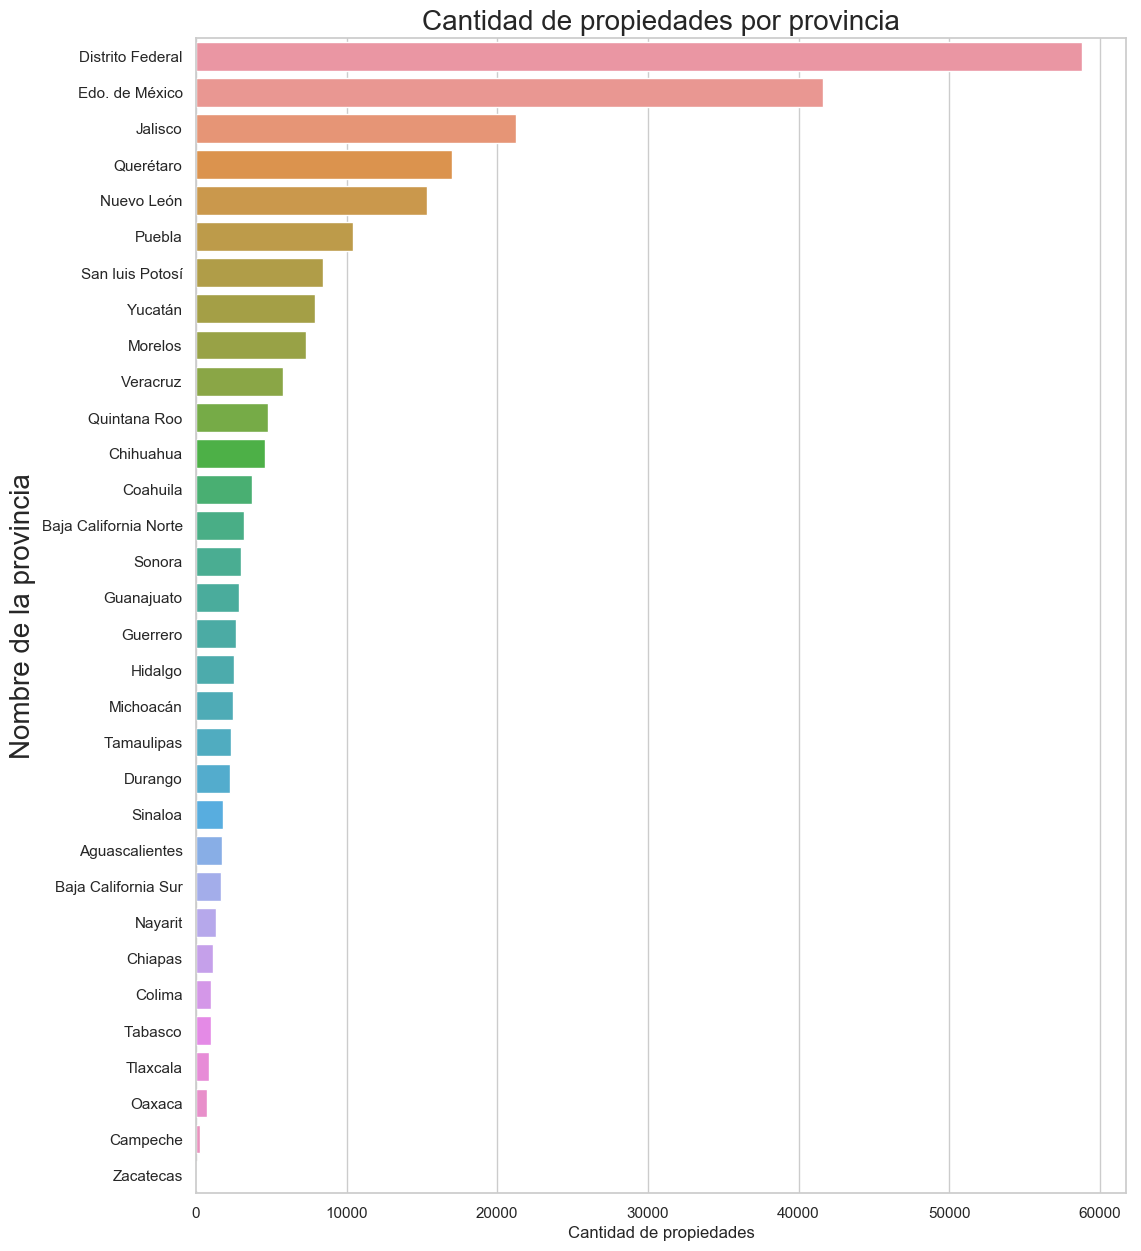

In [62]:
#Grafico de cantidad de propiedades por provincia
plt.rcParams['figure.figsize'] = (12, 15)
g = sns.barplot(x= train_prop_prov['cantidad_propiedades'], y=train_prop_prov['provincia'], orient='h', order = ['Distrito Federal', 'Edo. de México', 'Jalisco', 'Querétaro', 'Nuevo León', 'Puebla', 'San luis Potosí', 'Yucatán', 'Morelos', 'Veracruz', 'Quintana Roo', 'Chihuahua', 'Coahuila', 'Baja California Norte', 'Sonora', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Michoacán','Tamaulipas','Durango', 'Sinaloa', 'Aguascalientes', 'Baja California Sur', 'Nayarit', 'Chiapas', 'Colima', 'Tabasco', 'Tlaxcala', 'Oaxaca', 'Campeche', 'Zacatecas'])
g.set_title("Cantidad de propiedades por provincia", fontsize=20)
g.set_xlabel("Cantidad de propiedades", fontsize=12)
g.set_ylabel("Nombre de la provincia", fontsize=20)

In [64]:
# Muestra cada provincia con su correspondiente promedio de precio ordenados de mayor a menor
train_precio_prov = train_prov[['provincia', 'precio']].sort_values(by='precio', ascending=False)

train_precio_prov = train_precio_prov.rename(columns={'precio':'precio_promedio'})

train_precio_prov['precio_promedio_usd'] = train_precio_prov['precio_promedio'] * 0.051

train_precio_prov

,provincia,precio_promedio,precio_promedio_usd
8,Distrito Federal,"3,471,705.00","177,056.95"
10,Edo. de México,"2,762,465.00","140,885.72"
18,Nuevo León,"2,717,757.75","138,605.64"
12,Guerrero,"2,548,741.75","129,985.83"
22,Quintana Roo,"2,402,967.00","122,551.31"
14,Jalisco,"2,367,693.50","120,752.37"
26,Tabasco,"2,300,480.25","117,324.49"
20,Puebla,"2,298,403.75","117,218.59"
16,Morelos,"2,290,088.00","116,794.48"
21,Querétaro,"2,144,109.00","109,349.55"


Text(0, 0.5, 'Nombre de la provincia')

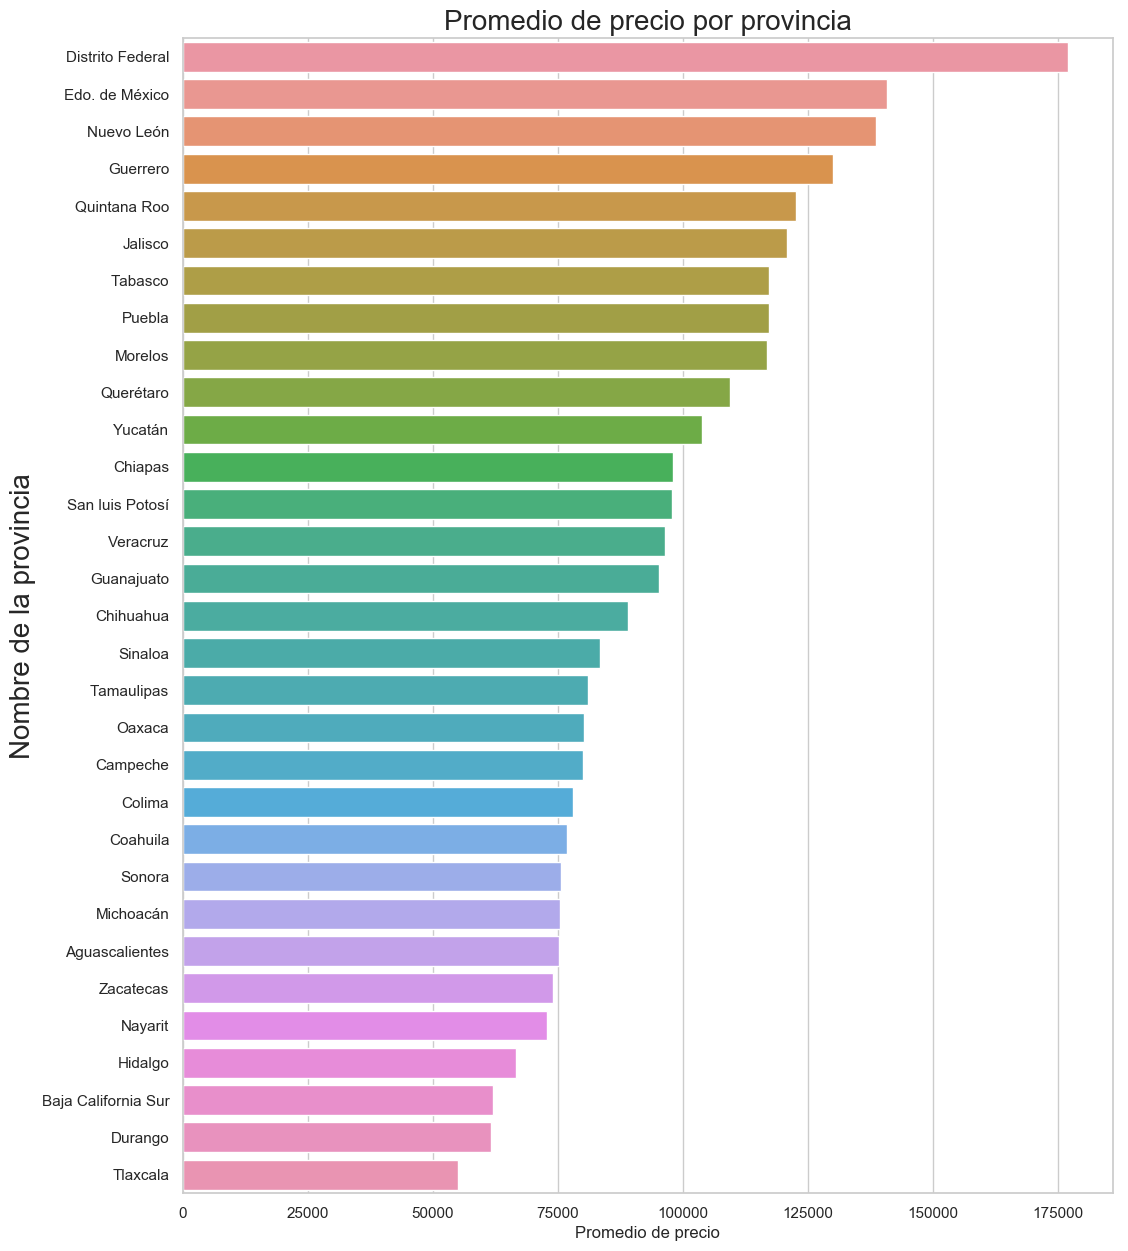

In [66]:
#Grafico de promedio de precio por provincia
plt.rcParams['figure.figsize'] = (12, 15)
g = sns.barplot(x= train_precio_prov['precio_promedio_usd'], y=train_prop_prov['provincia'], orient='h', order = ['Distrito Federal', 'Edo. de México', 'Nuevo León', 'Guerrero', 'Quintana Roo', 'Jalisco', 'Tabasco', 'Puebla', 'Morelos', 'Querétaro', 'Yucatán', 'Chiapas', 'San luis Potosí', 'Veracruz', 'Guanajuato', 'Chihuahua', 'Sinaloa', 'Tamaulipas', 'Oaxaca', 'Campeche', 'Colima', 'Coahuila','Sonora', 'Michoacán', 'Aguascalientes', 'Zacatecas', 'Nayarit', 'Hidalgo', 'Baja California Sur', 'Durango', 'Tlaxcala'])
g.set_title("Promedio de precio por provincia", fontsize=20)
g.set_xlabel("Promedio de precio", fontsize=12)
g.set_ylabel("Nombre de la provincia", fontsize=20)